# Housing Price Prediction

## Objective
Build and evaluate regression models to predict house prices based on demographic and geographic features.

## Dataset
California Housing dataset containing information about location, income, population, and housing characteristics.

## Approach
- Data loading and inspection
- data cleaning
- Exploratory Data Analysis (EDA)
- Feature engineering
- Model training and evaluation
- Model comparison and interpretation

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
data = pd.read_csv(r"C:\Users\nadah\Documents\DataAnalysisProjects\California Housing Prices\housing.csv")

In [38]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Handel missing values in total_bedrooms

In [41]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


C:\Users\nadah\AppData\Local\Temp\ipykernel_9064\110975751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Encode categorical var (ocean_proximity)

In [43]:
data = pd.get_dummies(data, columns=['ocean_proximity'])


In [44]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [45]:
data.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object

In [46]:
data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [47]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [48]:
data.head()
data.shape
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Data Analysis (EDA)
The goal of this exploratory data analysis is to understand the distribution of variables, identify relationships with the target variable, and detect potential issues such as skewness and outliers before model training.

Target value distribution

Text(0.5, 1.0, 'Distribution of Median House Value')

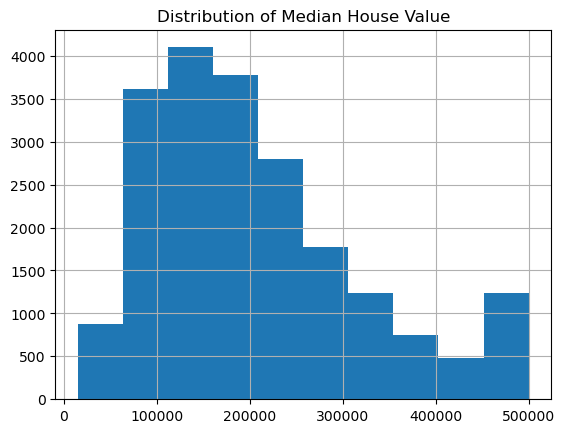

In [49]:
data.hist(column='median_house_value')  
plt.title("Distribution of Median House Value")



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

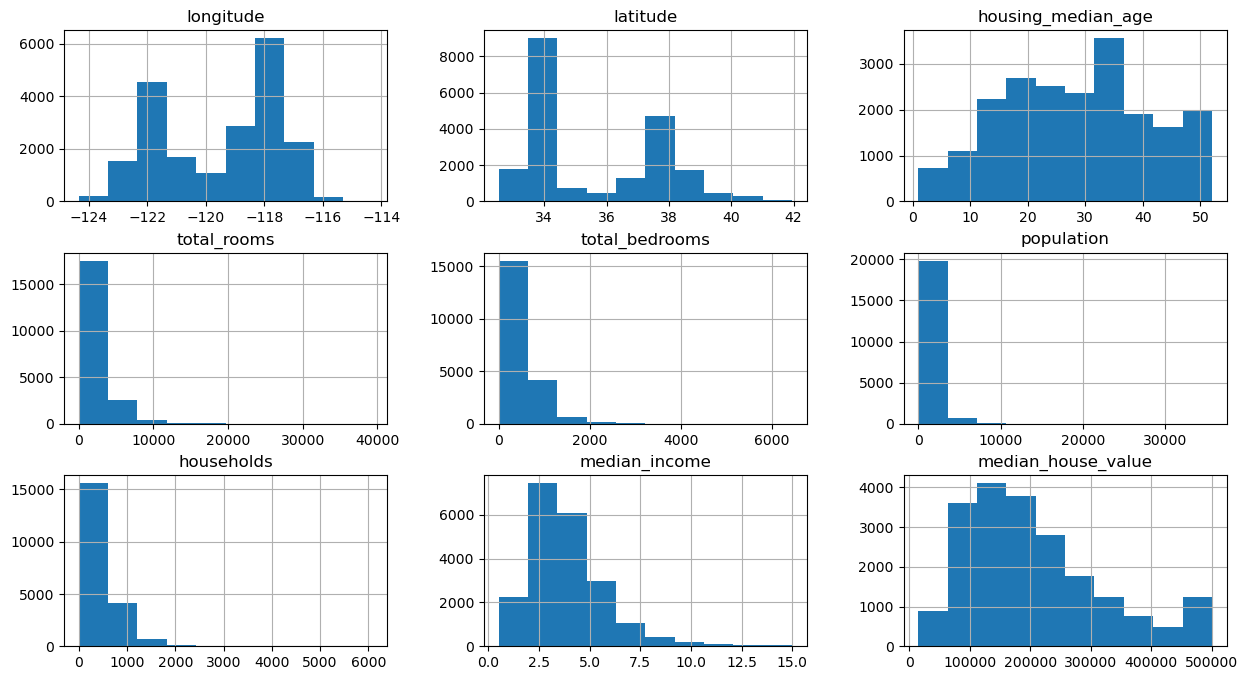

In [50]:
data.hist(figsize=( 15,8))


Most numerical features (rooms, bedrooms, population, households, income, house_value) are right-skewed 

Geographic features (longitude, latitude) show multi-modal clustering — likely reflecting urban vs rural areas.

housing_median_age and median_house_value are truncated at upper limits (capped values).

Text(0.5, 1.0, 'Correlation Heatmap')

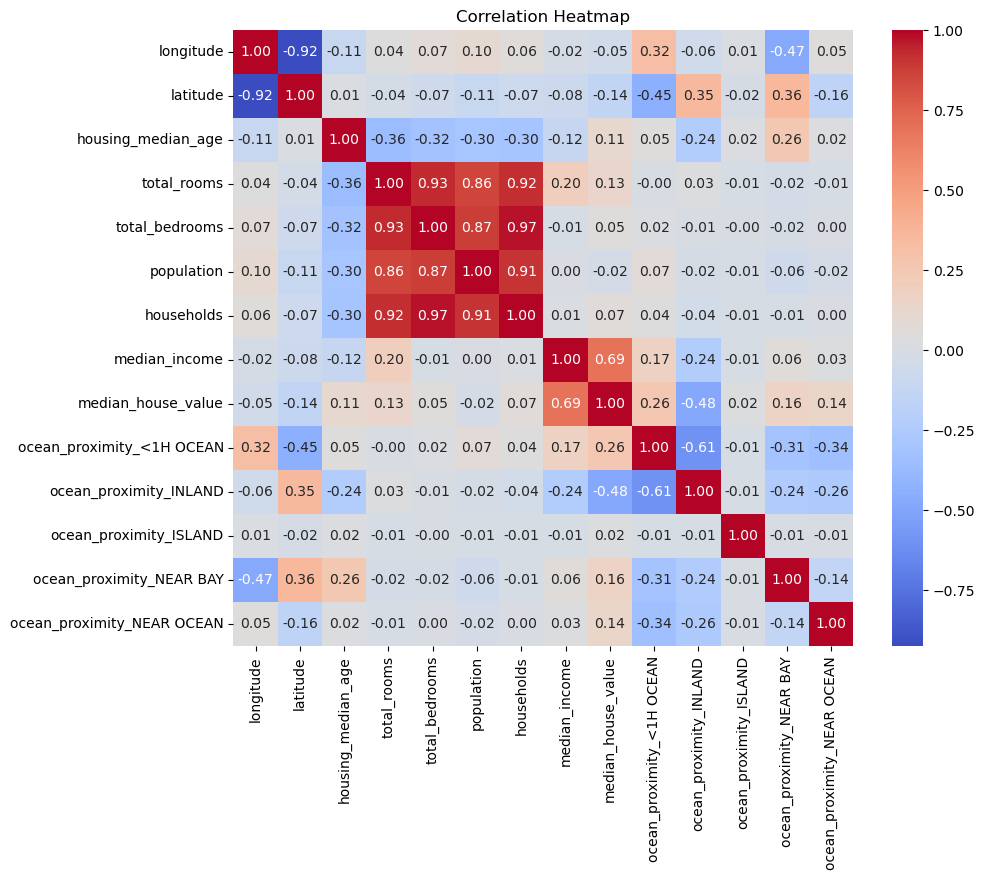

In [51]:
plt.figure(figsize=(10, 8))  # Optional: adjusts the size of the heatmap
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')


Median income shows the strongest positive correlation with house prices.

Text(0.5, 1.0, 'House Price vs Median Income')

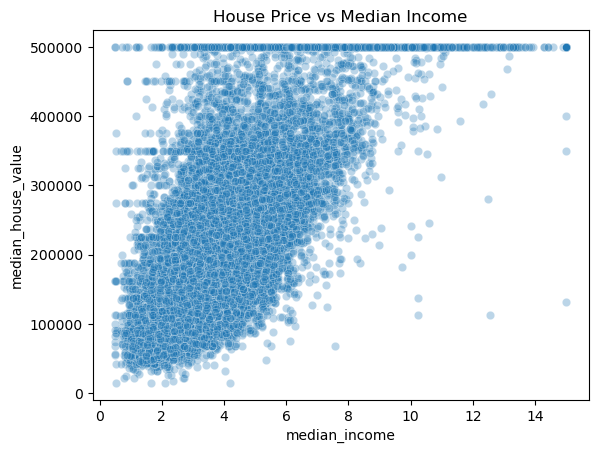

In [52]:
plt.figure()
sns.scatterplot(
    x=data['median_income'],
    y=data['median_house_value'],
    alpha=0.3
)
plt.title("House Price vs Median Income")


Clear positive relationship
Non-linear pattern → good for Random Forest

Text(0, 0.5, 'Latitude')

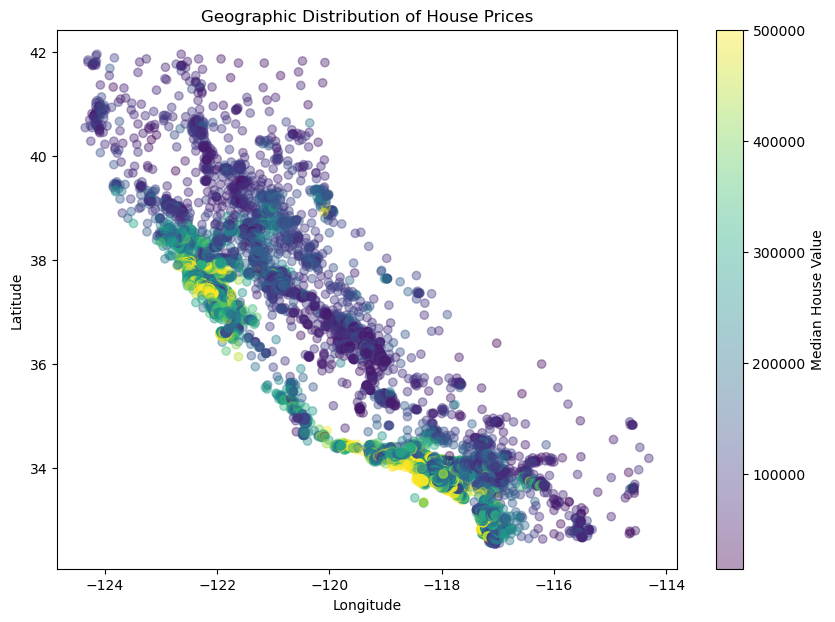

In [53]:
plt.figure(figsize=(10,7))
plt.scatter(
    data['longitude'],
    data['latitude'],
    c=data['median_house_value'],
    cmap='viridis',
    alpha=0.4
)
plt.colorbar(label='Median House Value')
plt.title("Geographic Distribution of House Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


House prices are significantly higher near the coast, highlighting the importance of geographic location.

Text(0, 0.5, 'Median House Value')

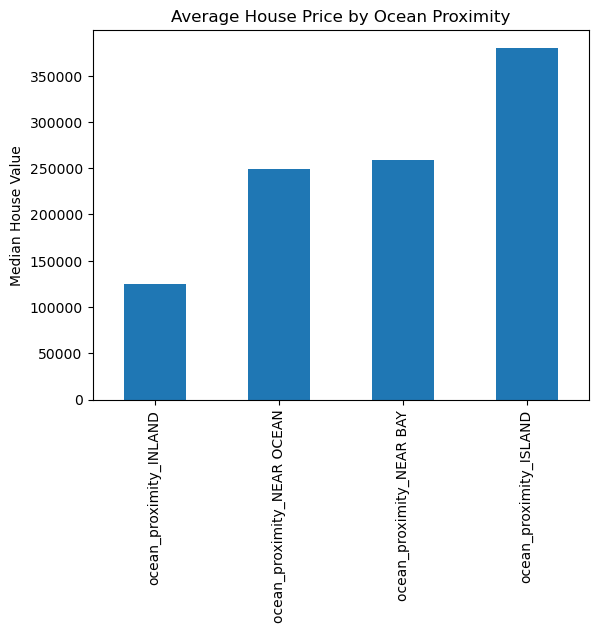

In [54]:
ocean_cols = [
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN'
]

avg_prices = {
    col: data[data[col] == 1]['median_house_value'].mean()
    for col in ocean_cols
}

pd.Series(avg_prices).sort_values().plot(kind='bar')
plt.title("Average House Price by Ocean Proximity")
plt.ylabel("Median House Value")


INLAND lowest

NEAR OCEAN / NEAR BAY highest

Text(0.5, 1.0, 'Boxplot of Total Rooms')

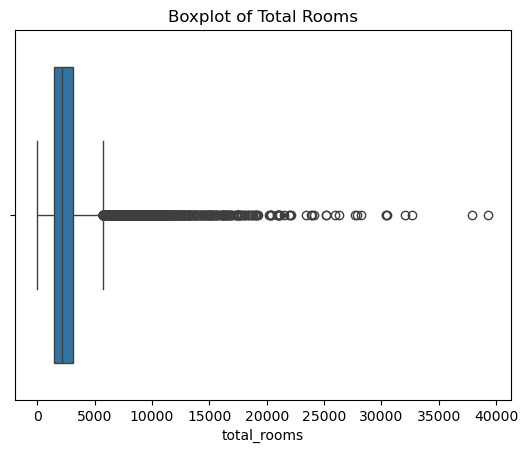

In [55]:
plt.figure()
sns.boxplot(x=data['total_rooms'])
plt.title("Boxplot of Total Rooms")



The distribution shows extreme values on the higher end, indicating potential outliers. These may affect linear models but are handled better by tree-based models.

## Feature Engineering



In [56]:
# Rooms and population ratios
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

#log transform for skewed features like total_rooms
data['log_total_rooms'] = np.log1p(data['total_rooms'])


Text(0.5, 1.0, 'Correlation Heatmap')

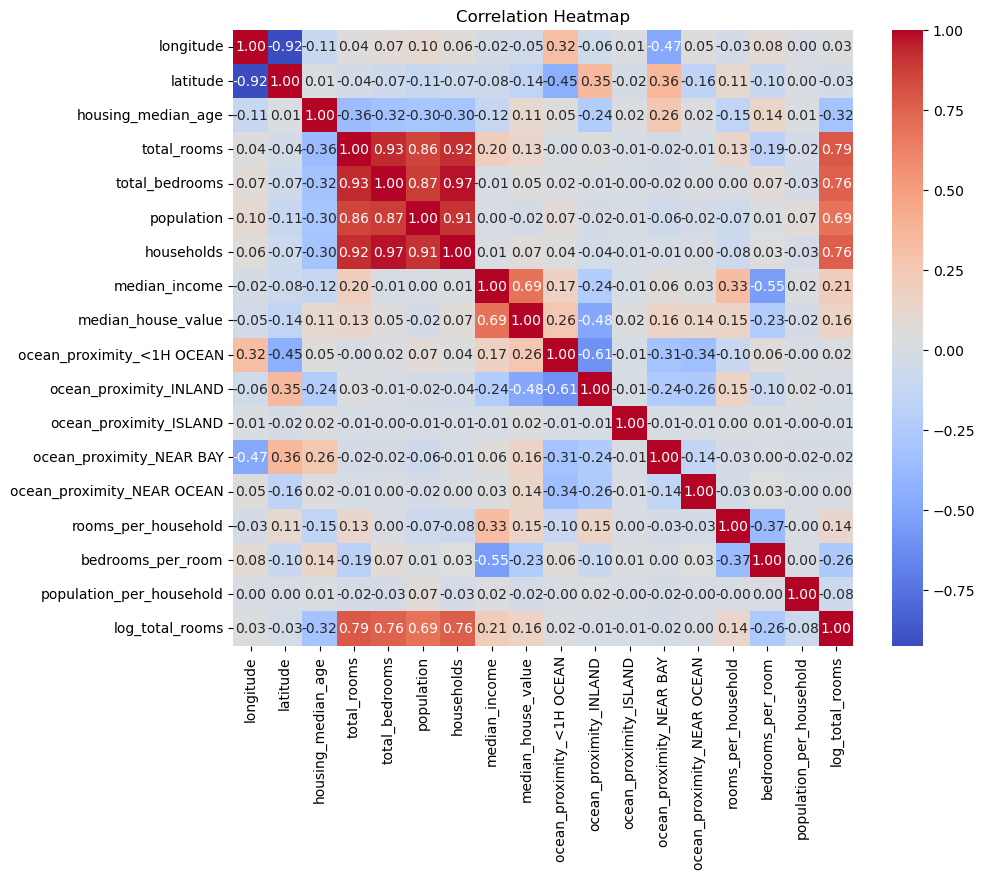

In [57]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')


## Tain/test split

In [58]:
from sklearn.model_selection import train_test_split
#seperate target and features
X = data.drop('median_house_value', axis = 1)
y = data['median_house_value']
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

## Scaling for linear regression

In [59]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training
Linear Regression is used as a baseline model, while Random Forest is applied to capture non-linear relationships.


In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)


LinearRegression()

In [61]:
test_data = X_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household,log_total_rooms,median_house_value
670,-122.16,37.69,36.0,1118.0,219.0,625.0,228.0,3.7813,False,False,False,True,False,4.903509,0.195886,2.741228,7.020191,192200.0
12999,-121.25,38.67,14.0,6155.0,1034.0,2407.0,941.0,4.2262,False,True,False,False,False,6.540914,0.167994,2.557917,8.725182,244300.0
16660,-120.70,35.31,24.0,3504.0,521.0,1490.0,506.0,4.6719,False,False,False,False,True,6.924901,0.148687,2.944664,8.161946,337000.0
18448,-121.81,37.23,16.0,1674.0,281.0,850.0,254.0,5.3157,True,False,False,False,False,6.590551,0.167861,3.346457,7.423568,253300.0
8812,-118.31,33.75,36.0,2715.0,474.0,1303.0,457.0,4.6042,False,False,False,False,True,5.940919,0.174586,2.851204,7.906915,357300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,-118.36,34.22,37.0,1512.0,348.0,1545.0,351.0,3.7663,True,False,False,False,False,4.307692,0.230159,4.401709,7.321850,160300.0
9832,-121.93,36.63,33.0,1740.0,342.0,638.0,329.0,3.1912,False,False,False,False,True,5.288754,0.196552,1.939210,7.462215,319800.0
3694,-118.38,34.20,23.0,4138.0,1171.0,3911.0,1068.0,3.0125,True,False,False,False,False,3.874532,0.282987,3.661985,8.328209,181700.0
3964,-118.58,34.20,21.0,2979.0,744.0,1824.0,692.0,3.5000,True,False,False,False,False,4.304913,0.249748,2.635838,7.999679,223700.0


## Model Evaluation


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_reg = reg.predict(X_test_scaled)
# Evaluate
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2_reg = r2_score(y_test, y_pred_reg)

print("Linear Regression RMSE:", round(rmse_reg,2))
print("Linear Regression R²:", round(r2_reg,3))

Linear Regression RMSE: 69414.46
Linear Regression R²: 0.635


Random Forest Regressor


In [63]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", round(rmse_rf,2))
print("Random Forest R²:", round(r2_rf,3))

Random Forest RMSE: 49626.85
Random Forest R²: 0.813


Random Forest achieves a lower RMSE and higher R² score than Linear Regression, indicating better predictive performance.


## Error Analysis

Comparison between actual and predicted house prices using the Random Forest model.


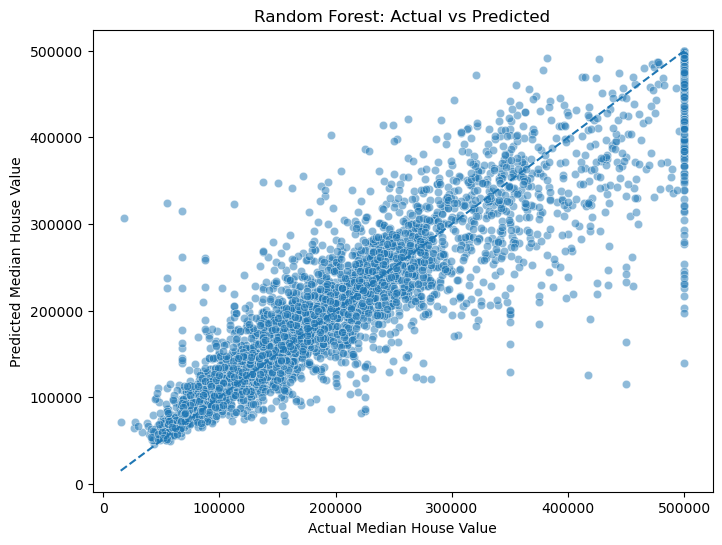

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


The scatter plot shows that most predictions are close to the diagonal, indicating good model performance.  
However, higher house values tend to be underpredicted, suggesting the model struggles with extreme values.

This analysis helps identify model limitations beyond aggregate metrics such as RMSE and R².


## Feature Importance Analysis


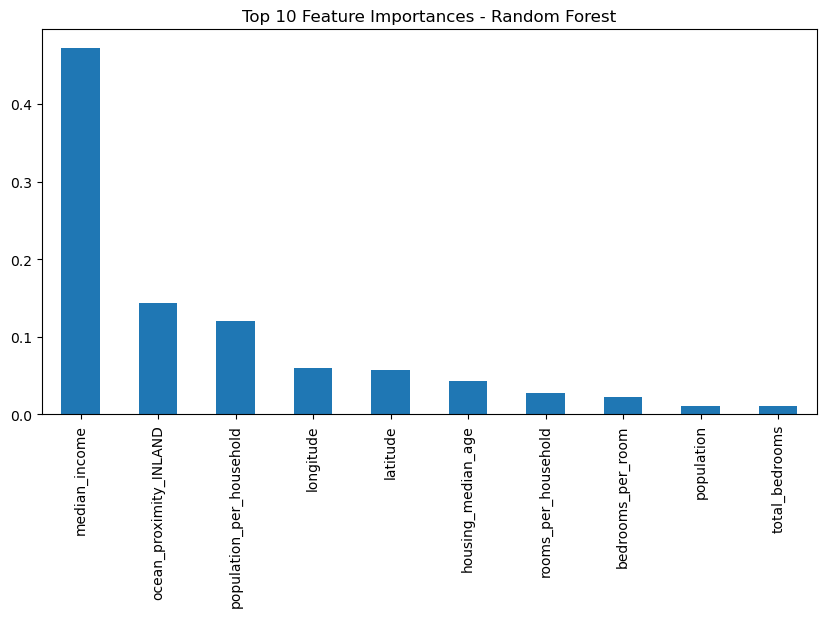

In [65]:
import pandas as pd

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()



The plot shows the top 10 most important features used by the Random Forest model.  
Median income is the most influential predictor of housing prices, followed by location-related features.

This aligns with real-world expectations, as income levels and geographic location strongly impact housing value.  
The ability of Random Forest to capture non-linear relationships explains its superior performance compared to linear regression.


## Conclusion

This project demonstrated an end-to-end machine learning workflow, from data exploration to model evaluation.  
Random Forest outperformed Linear Regression, and feature importance analysis highlighted income and location as key drivers of housing prices.

Future work could include hyperparameter tuning and additional feature engineering.
